# PACKAGES AND LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# PATH PROCESS

#### TRAIN

In [ ]:
No_Data_Path = Path("/content/drive/MyDrive/tumor/no")
Yes_Data_Path = Path("/content/drive/MyDrive/tumor/yes")

In [ ]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [ ]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('/content/drive/MyDrive/tumor/no/no1410.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no145.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no1451.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no1456.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no1465.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('/content/drive/MyDrive/tumor/yes/y1428.jpg'), PosixPath('/content/drive/MyDrive/tumor/yes/y1420.jpg'), PosixPath('/content/drive/MyDrive/tumor/yes/y1419.jpg'), PosixPath('/content/drive/MyDrive/tumor/yes/y1447.jpg'), PosixPath('/content/drive/MyDrive/tumor/yes/y1435.jpg')]


In [ ]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)

for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [ ]:
print(Yes_No_List[0:10])

[PosixPath('/content/drive/MyDrive/tumor/no/no1410.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no145.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no1451.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no1456.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no1465.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no1452.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no1476.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no147.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no1462.jpg'), PosixPath('/content/drive/MyDrive/tumor/no/no1448.jpg')]


In [ ]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [ ]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [ ]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [ ]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [ ]:
print(Main_Train_Data.head(-1))

                                             JPG TUMOR_CATEGORY
0     /content/drive/MyDrive/tumor/no/no1410.jpg             no
1      /content/drive/MyDrive/tumor/no/no145.jpg             no
2     /content/drive/MyDrive/tumor/no/no1451.jpg             no
3     /content/drive/MyDrive/tumor/no/no1456.jpg             no
4     /content/drive/MyDrive/tumor/no/no1465.jpg             no
...                                          ...            ...
2994  /content/drive/MyDrive/tumor/yes/y1418.jpg            yes
2995  /content/drive/MyDrive/tumor/yes/y1429.jpg            yes
2996  /content/drive/MyDrive/tumor/yes/y1424.jpg            yes
2997  /content/drive/MyDrive/tumor/yes/y1450.jpg            yes
2998  /content/drive/MyDrive/tumor/yes/y1441.jpg            yes

[2999 rows x 2 columns]


#### TEST

In [ ]:
Prediction_Path = Path("/content/drive/MyDrive/tumor/pred")

In [ ]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [ ]:
print(Test_JPG_Path[0:5])

[PosixPath('/content/drive/MyDrive/tumor/pred/pred19.jpg'), PosixPath('/content/drive/MyDrive/tumor/pred/pred41.jpg'), PosixPath('/content/drive/MyDrive/tumor/pred/pred30.jpg'), PosixPath('/content/drive/MyDrive/tumor/pred/pred2.jpg'), PosixPath('/content/drive/MyDrive/tumor/pred/pred29.jpg')]


In [ ]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [ ]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [ ]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [ ]:
print(Test_Data.head())

                                            JPG TUMOR_CATEGORY
0  /content/drive/MyDrive/tumor/pred/pred19.jpg           pred
1  /content/drive/MyDrive/tumor/pred/pred41.jpg           pred
2  /content/drive/MyDrive/tumor/pred/pred30.jpg           pred
3   /content/drive/MyDrive/tumor/pred/pred2.jpg           pred
4  /content/drive/MyDrive/tumor/pred/pred29.jpg           pred


# SHUFFLING

In [ ]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(Main_Train_Data.head(-1))

                                             JPG TUMOR_CATEGORY
0      /content/drive/MyDrive/tumor/no/no456.jpg             no
1      /content/drive/MyDrive/tumor/yes/y837.jpg            yes
2      /content/drive/MyDrive/tumor/yes/y210.jpg            yes
3     /content/drive/MyDrive/tumor/yes/y1044.jpg            yes
4      /content/drive/MyDrive/tumor/yes/y441.jpg            yes
...                                          ...            ...
2994  /content/drive/MyDrive/tumor/yes/y1145.jpg            yes
2995   /content/drive/MyDrive/tumor/no/no136.jpg             no
2996   /content/drive/MyDrive/tumor/yes/y182.jpg            yes
2997  /content/drive/MyDrive/tumor/no/no1156.jpg             no
2998   /content/drive/MyDrive/tumor/no/no380.jpg             no

[2999 rows x 2 columns]


# VISUALIZATION

Text(0.5, 1.0, 'yes')

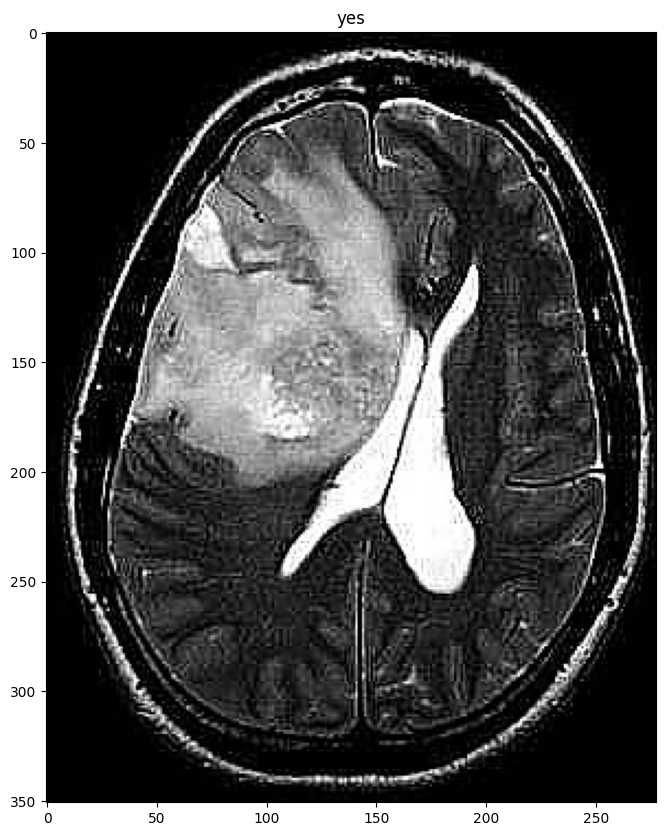

In [ ]:
  figure = plt.figure(figsize=(10,10))
  plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
  plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'no')

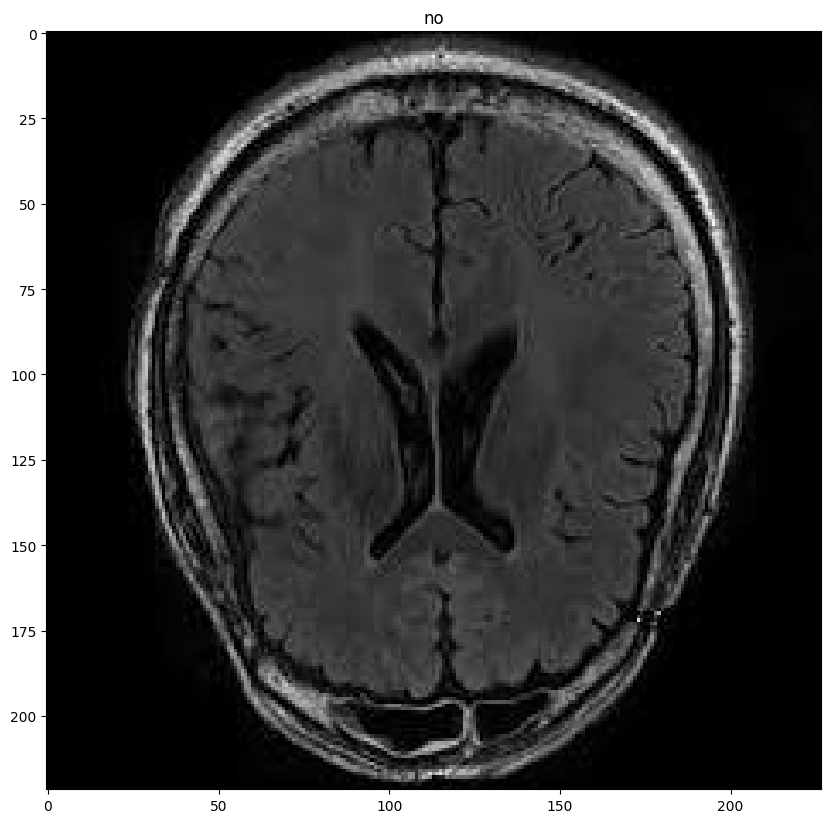

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

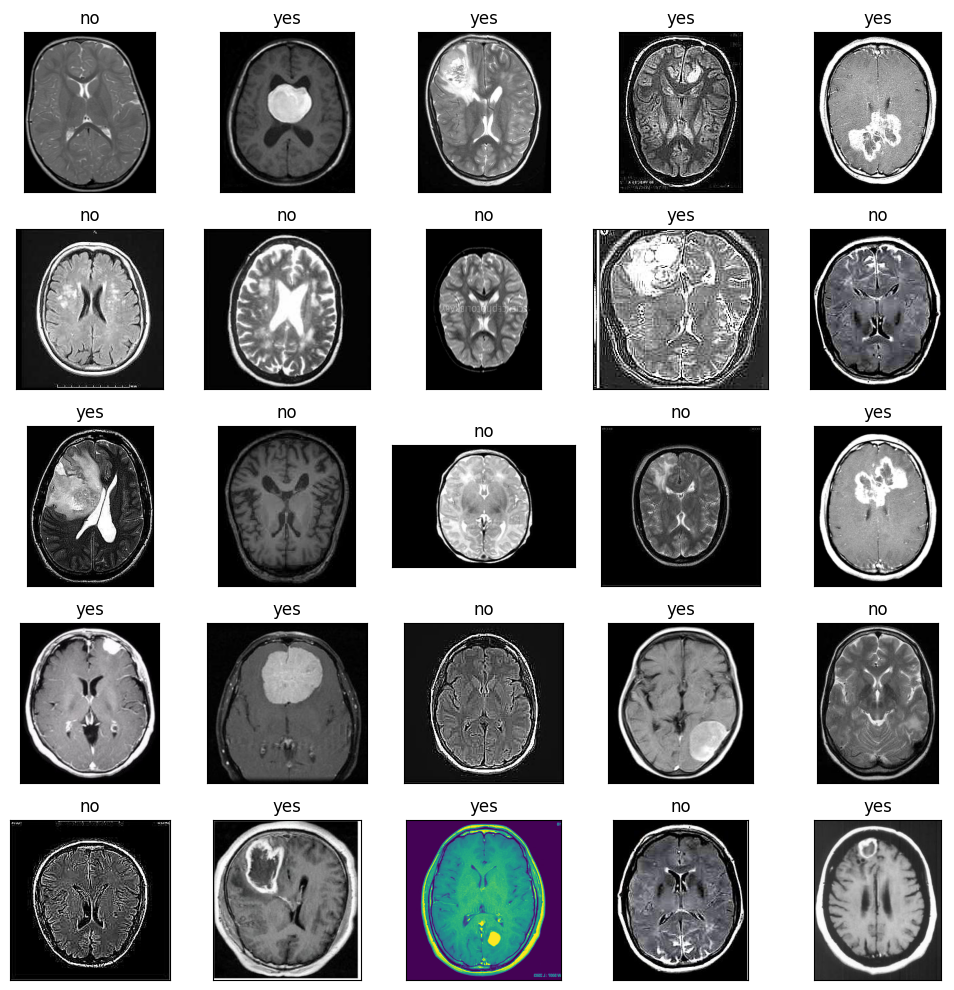

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

# MODEL TRAINING DATA

In [ ]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [ ]:
print(train_data.shape)

(2700, 2)


In [ ]:
print(train_data.head())

                                             JPG TUMOR_CATEGORY
433   /content/drive/MyDrive/tumor/yes/y1154.jpg            yes
1151   /content/drive/MyDrive/tumor/yes/y737.jpg            yes
73     /content/drive/MyDrive/tumor/yes/y598.jpg            yes
1536  /content/drive/MyDrive/tumor/no/no1130.jpg             no
2709  /content/drive/MyDrive/tumor/no/no1410.jpg             no


In [ ]:
print(test_data.shape)

(300, 2)


In [ ]:
print(test_data.head())

                                             JPG TUMOR_CATEGORY
1801   /content/drive/MyDrive/tumor/yes/y104.jpg            yes
1190   /content/drive/MyDrive/tumor/yes/y466.jpg            yes
1817  /content/drive/MyDrive/tumor/no/no1226.jpg             no
251   /content/drive/MyDrive/tumor/yes/y1458.jpg            yes
2505  /content/drive/MyDrive/tumor/no/no1483.jpg             no


# IMAGE DATA GENERATOR WITHOUT DIVERSIFICATION

#### BASED ON TRAIN DATA

This means image data generator means data augumentaion and image data preprocessing method, and then "rescale" argument is used to scale down the pixel values

"validation split" means 10% of val data and reminder 90% of test data

In [ ]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [ ]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200)) #batch size means number of samples from each batch
                                               #target size means image resize which one is already used in training set

Found 2430 validated image filenames belonging to 2 classes.


In [ ]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [ ]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


#### CHECKING

In [ ]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 0, 1, 0]
(200, 200, 1)


In [ ]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 1, 0, 0]
(200, 200, 1)


In [ ]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 0, 1, 0]
(200, 200, 1)


# CNN MODEL

#### MODEL STRUCTURE

In [ ]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

#### MODEL COMPILE

In [ ]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
#RMSprop is a optimization algorithim for NN helps to adjusts learning rate
#categorical cross entropy mainly used for multiclass classification problem its commenly used for loss function

#### MODEL FITTING

In [ ]:
CNN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=120)# epochs means specifies the num.of.times entire traning data will train cnn model
                      #120 means training dataset will be splitted 120 batches

Epoch 1/30
120/120 [==============================] - 565s 5s/step - loss: 0.9362 - accuracy: 0.7272 - val_loss: 0.5179 - val_accuracy: 0.7111
Epoch 2/30
120/120 [==============================] - 192s 2s/step - loss: 0.4081 - accuracy: 0.8238 - val_loss: 0.2741 - val_accuracy: 0.8556
Epoch 3/30
120/120 [==============================] - 201s 2s/step - loss: 0.3091 - accuracy: 0.8678 - val_loss: 0.2444 - val_accuracy: 0.9111
Epoch 4/30
120/120 [==============================] - 193s 2s/step - loss: 0.2591 - accuracy: 0.8916 - val_loss: 0.1949 - val_accuracy: 0.9222
Epoch 5/30
120/120 [==============================] - 197s 2s/step - loss: 0.2105 - accuracy: 0.9159 - val_loss: 0.1471 - val_accuracy: 0.9333
Epoch 6/30
120/120 [==============================] - 200s 2s/step - loss: 0.1705 - accuracy: 0.9364 - val_loss: 0.1124 - val_accuracy: 0.9593
Epoch 7/30
120/120 [==============================] - 190s 2s/step - loss: 0.1514 - accuracy: 0.9388 - val_loss: 0.1297 - val_accuracy: 0.9519

#### MODEL SUMMARY

In [ ]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

#### CHECKING MODEL WITH GRAPHIC

In [ ]:
HistoryDict = CNN_Model.history #in this case his dict means typically stores all the values from only 2nd epochs so range of object needs to start 1 instead od 0

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

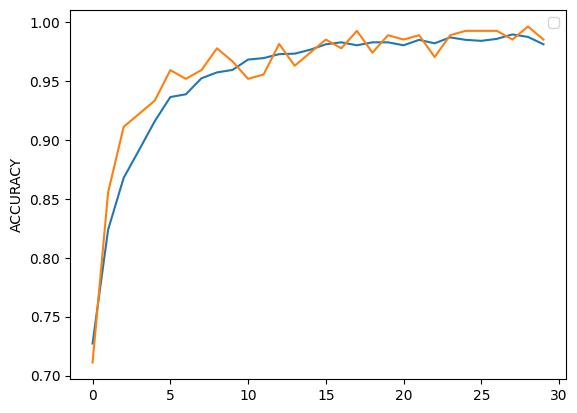

In [ ]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

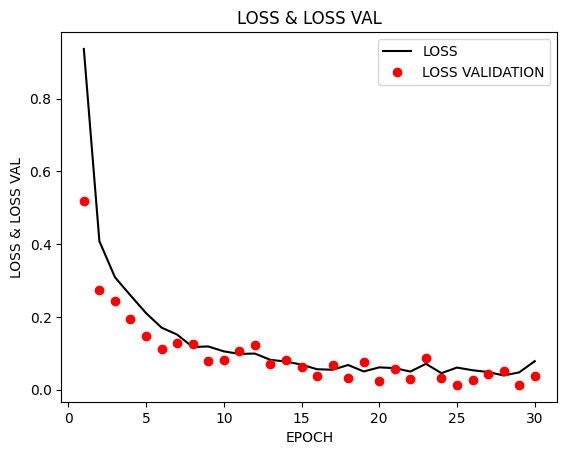

In [ ]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

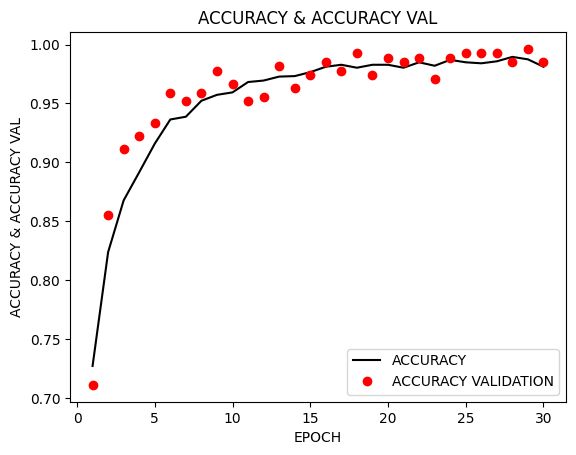

In [ ]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<Axes: >

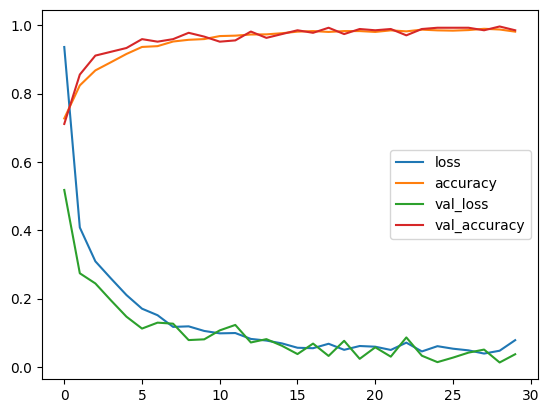

In [ ]:
Dict_Summary = pd.DataFrame(CNN_Model.history)
Dict_Summary.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [ ]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.1632
ACCURACY:  0.97


#### PREDICTION PROCESS

In [ ]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [ ]:
print(Main_Data_Prediction.head())

                                            JPG
0  /content/drive/MyDrive/tumor/pred/pred19.jpg
1  /content/drive/MyDrive/tumor/pred/pred41.jpg
2  /content/drive/MyDrive/tumor/pred/pred30.jpg
3   /content/drive/MyDrive/tumor/pred/pred2.jpg
4  /content/drive/MyDrive/tumor/pred/pred29.jpg


In [ ]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [ ]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [ ]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

3/3 [==============================] - 9s 4s/step


In [ ]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [ ]:
print(Model_Test_Prediction)

[0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0]


In [ ]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR']


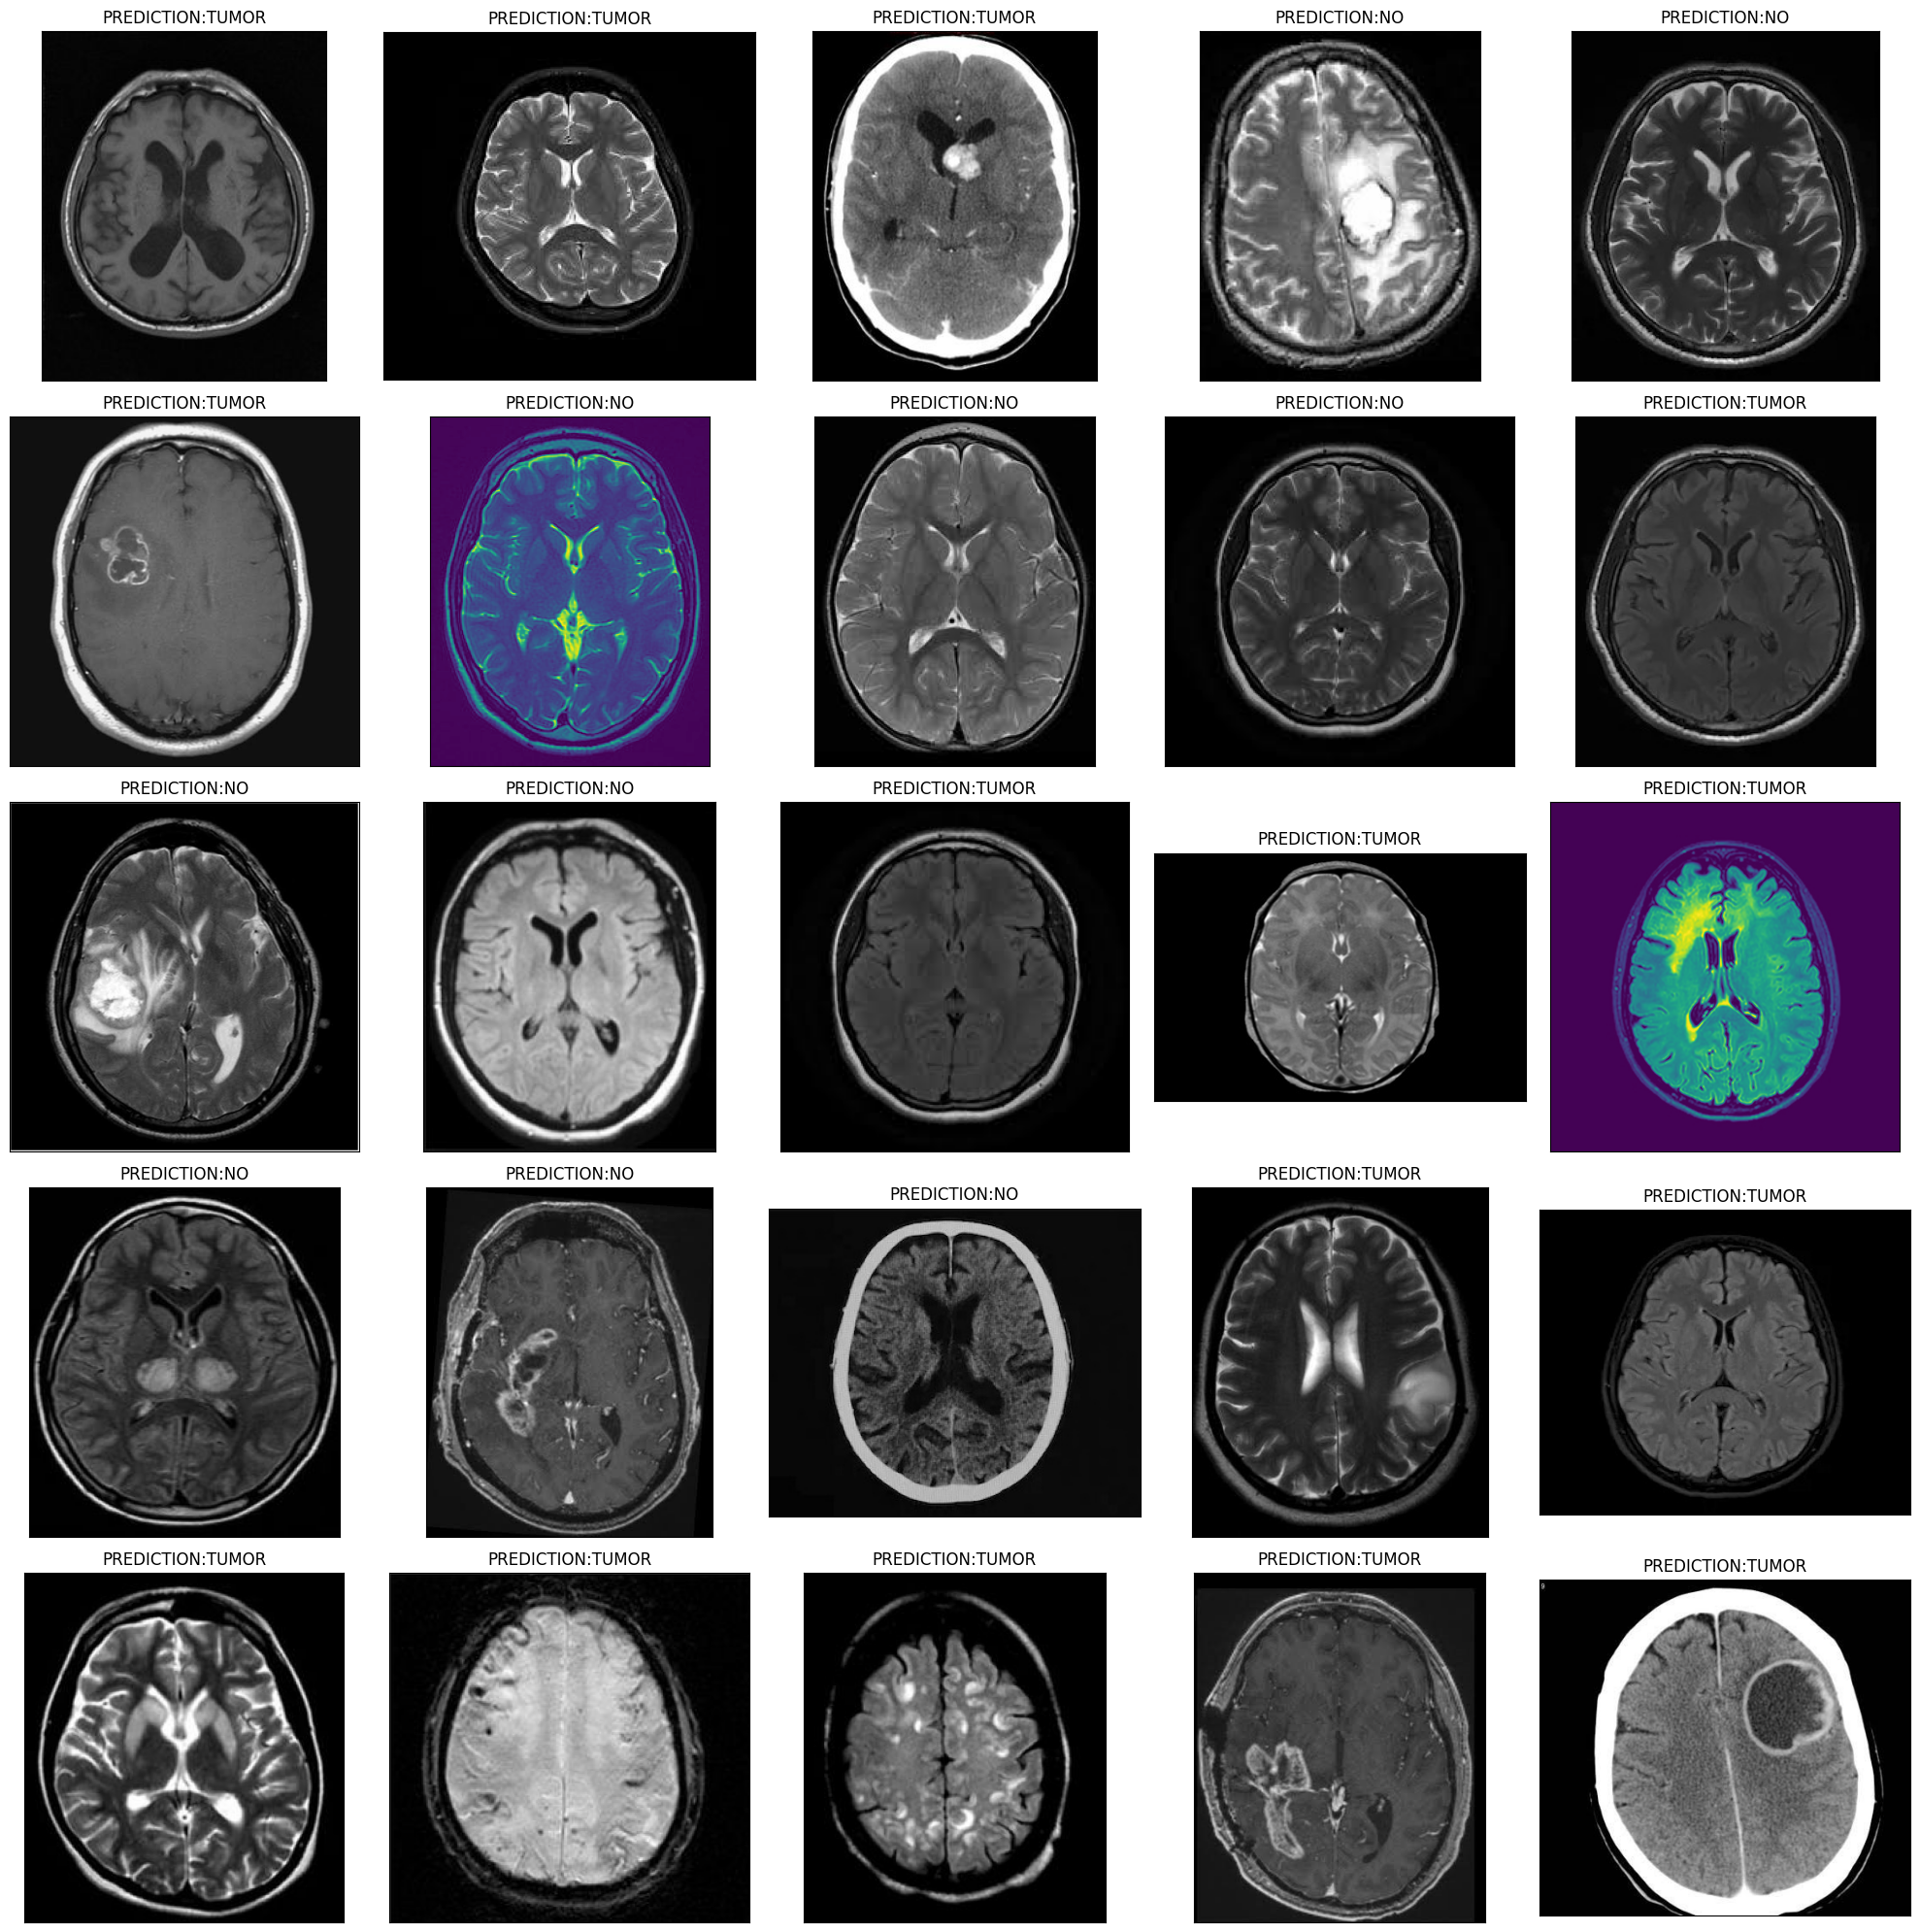

In [ ]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

# IMAGE DATA GENERATOR WITH DIVERSIFICATION

In [ ]:
Data_Generator_Div = ImageDataGenerator(rescale=1./255,brightness_range=[0.3,0.9],
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       validation_split=0.1)

In [ ]:
Train_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [ ]:
Validation_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [ ]:
Test_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200)) # NONE means we're not using any y labels for prediction
                                                        #batch size 20 means in this case generator will generate the batches of 20 images

Found 60 validated image filenames.


# ANN MODEL

#### MODEL STRUCTURE

In [ ]:
Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1))) # this means 200 * 200 pixe and 1 means single chennal
Model_Two.add(MaxPool2D((2,2))) #32 filters cov2D kernel size 5 * 5
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))

#### MODEL COMPILE

In [ ]:
Model_Two.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#### MODEL FITTING

#### MODEL SUMMARY

In [ ]:
ANN_Model_Two = Model_Two.fit(Train_Set_Div,
                              validation_data=Validation_Set_Div,
                              batch_size=20,
                      epochs=50)

Epoch 1/50
122/122 [==============================] - 171s 1s/step - loss: 0.7095 - accuracy: 0.6115 - val_loss: 0.6361 - val_accuracy: 0.6889
Epoch 2/50
122/122 [==============================] - 169s 1s/step - loss: 0.6456 - accuracy: 0.6494 - val_loss: 0.6283 - val_accuracy: 0.6185
Epoch 3/50
122/122 [==============================] - 168s 1s/step - loss: 0.6085 - accuracy: 0.6909 - val_loss: 0.5454 - val_accuracy: 0.7444
Epoch 4/50
122/122 [==============================] - 169s 1s/step - loss: 0.5727 - accuracy: 0.7247 - val_loss: 0.5259 - val_accuracy: 0.7370
Epoch 5/50
122/122 [==============================] - 169s 1s/step - loss: 0.5658 - accuracy: 0.7288 - val_loss: 0.8893 - val_accuracy: 0.5481
Epoch 6/50
122/122 [==============================] - 167s 1s/step - loss: 0.5426 - accuracy: 0.7605 - val_loss: 0.5002 - val_accuracy: 0.7741
Epoch 7/50
122/122 [==============================] - 171s 1s/step - loss: 0.5130 - accuracy: 0.7687 - val_loss: 0.5282 - val_accuracy: 0.7444

In [ ]:
print(Model_Two.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 128)     

#### CHECKING MODEL WITH GRAPHIC

In [ ]:
HistoryDict_Two = ANN_Model_Two.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)

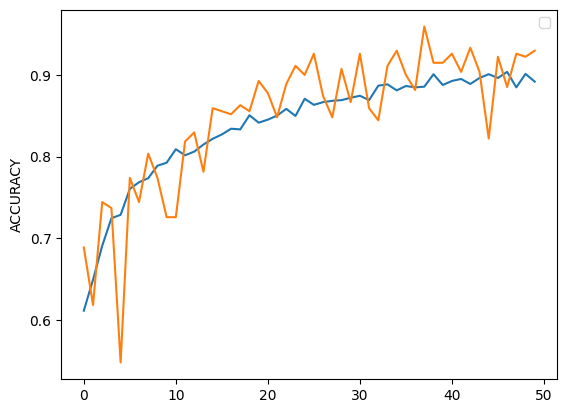

In [ ]:
plt.plot(ANN_Model_Two.history["accuracy"])
plt.plot(ANN_Model_Two.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

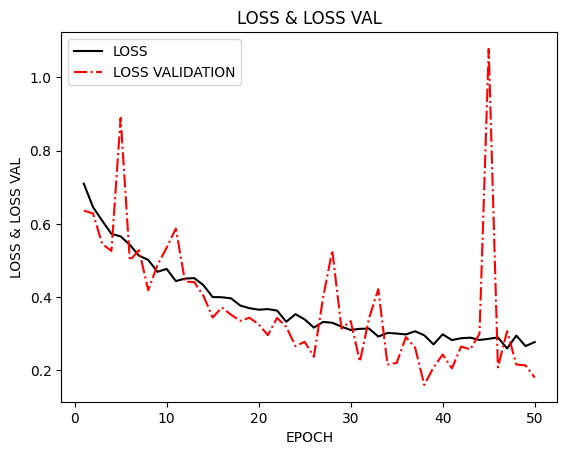

In [ ]:
plt.plot(epochs_Two,losses_Two,"k-",label="LOSS")
plt.plot(epochs_Two,val_losses_Two,"r-.",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

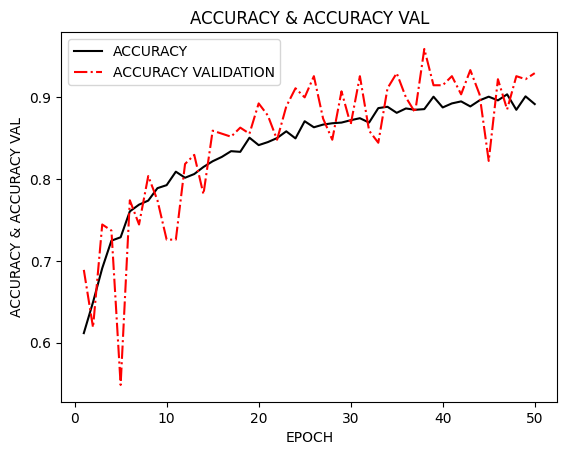

In [ ]:
plt.plot(epochs_Two,acc_Two,"k-",label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,"r-.",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<Axes: >

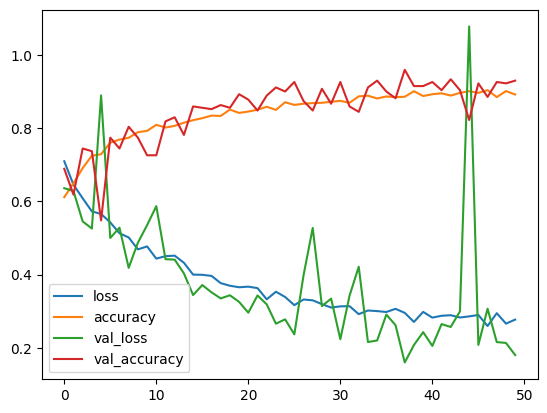

In [ ]:
Dict_Summary_Two = pd.DataFrame(ANN_Model_Two.history)
Dict_Summary_Two.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [ ]:
Model_Results_Two = Model_Two.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

LOSS:  0.6403
ACCURACY:  0.88


#### PREDICTION PROCESS

In [ ]:
Model_Test_Prediction_Two = Model_Two.predict(Test_Set_Div)

3/3 [==============================] - 2s 544ms/step


In [ ]:
Model_Test_Prediction_Two = Model_Test_Prediction_Two.argmax(axis=-1)

In [ ]:
print(Model_Test_Prediction_Two)

[1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1]


In [ ]:
Last_Prediction_Two = []
[Last_Prediction_Two.append('NO') if i == 1 else Last_Prediction_Two.append('TUMOR') for i in Model_Test_Prediction_Two]
print(Last_Prediction_Two)

['NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO']


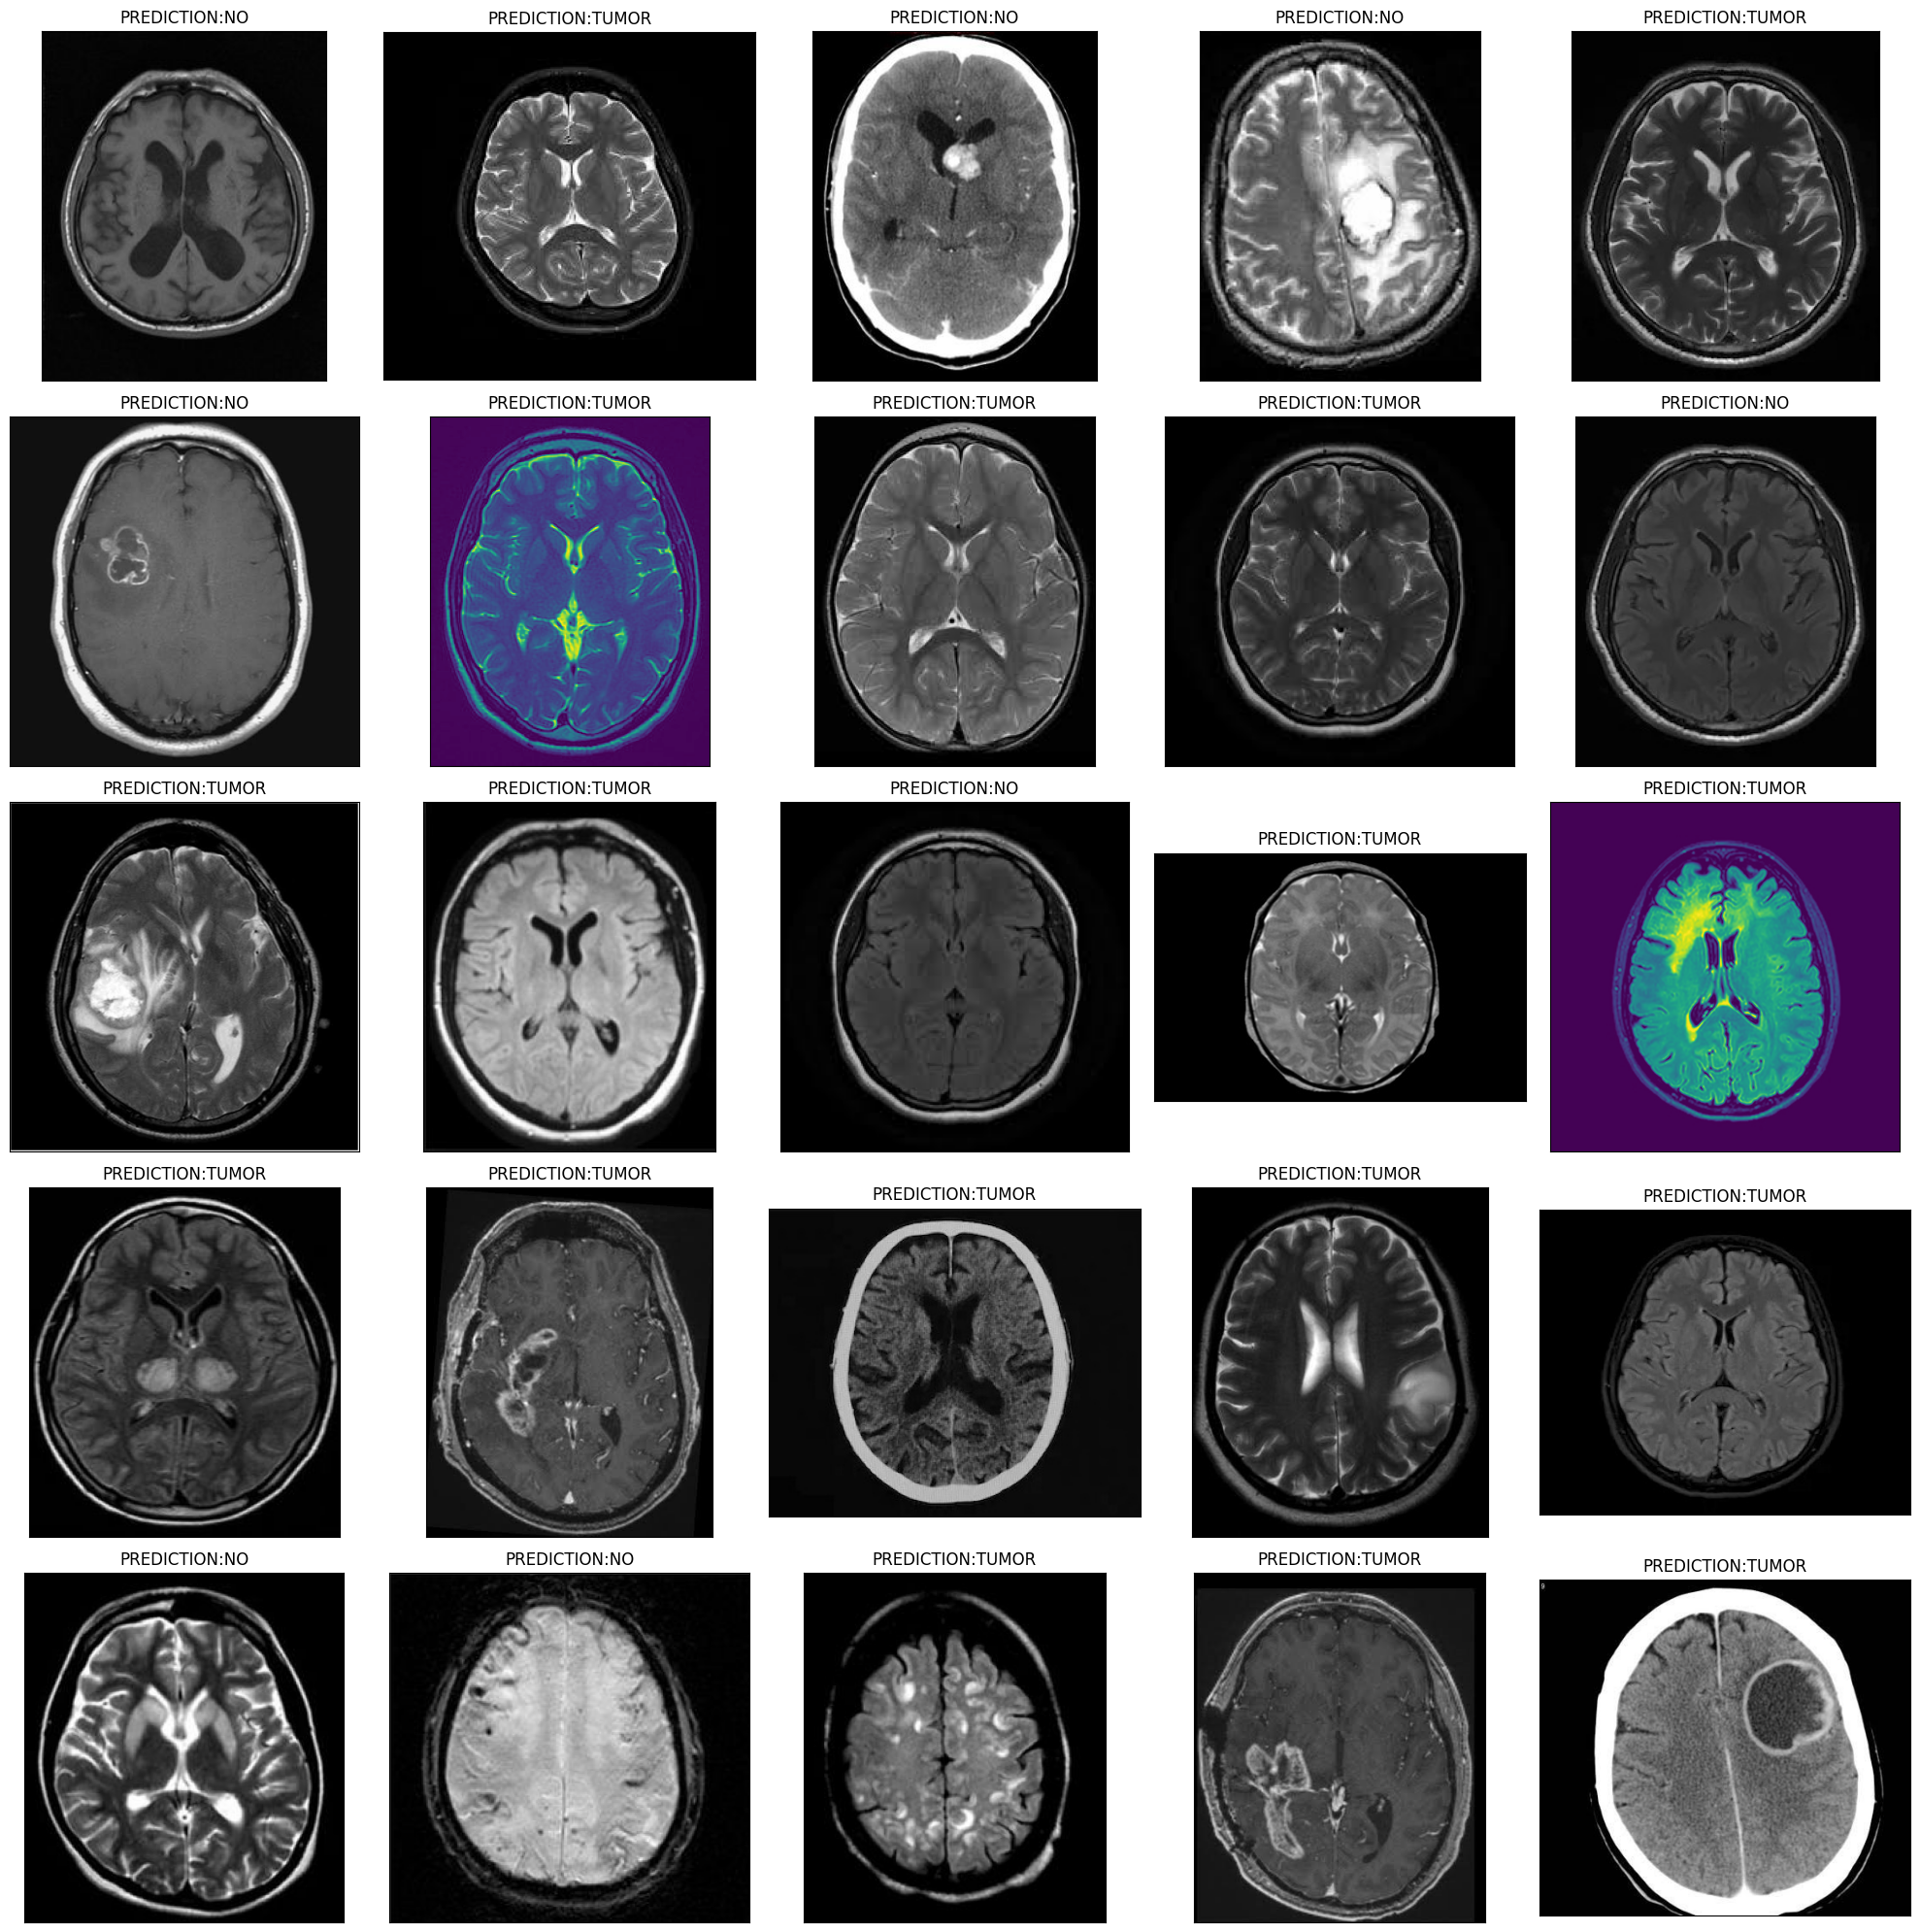

In [ ]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction_Two[i]}")
plt.tight_layout()
plt.show()